In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
%matplotlib inline

In [18]:
phys = pd.read_csv("/Applications/datathon/Datathon2020data/phys_final.csv")
phys

,PID,AttendingPhysician,State,County,Is_inpatient,AmtReimbursed,StartDt,Fraud
0,PRV55912,PHY390922,39,230,1,26000,2009-04-12,1
1,PRV55912,PHY349293,39,230,1,19000,2009-01-20,1
2,PRV55912,PHY334706,39,600,1,17000,2009-10-17,1
3,PRV55912,PHY390614,39,280,1,13000,2009-10-25,1
4,PRV55912,PHY380413,39,510,1,3000,2009-01-08,1
...,...,...,...,...,...,...,...,...
558206,PRV54302,PHY376238,25,150,0,3300,2009-02-08,0
558207,PRV57762,PHY432730,21,230,0,1900,2009-09-28,0
558208,PRV51577,PHY338096,5,200,0,2100,2009-07-09,0
558209,PRV53083,PHY416646,16,490,0,10,2009-04-16,0


In [5]:
phys.describe()

,State,County,Is_inpatient,AmtReimbursed,Fraud
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,25.446969,378.588195,0.072507,997.012133,0.381211
std,15.192784,265.215531,0.259325,3821.534891,0.485685
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,150.000000,0.000000,40.000000,0.000000
50%,24.000000,350.000000,0.000000,80.000000,0.000000
75%,38.000000,570.000000,0.000000,300.000000,1.000000
max,54.000000,999.000000,1.000000,125000.000000,1.000000


In [6]:
# phys['Fraud'] = np.where(phys['Fraud']==1,'1','0')

In [586]:
# phys[phys['InpatientAnnualReimbursementAmt']<=0].describe(include='all')

,PID,State,County,AttendingPhysician,StartDt,Fraud,AmtReimbursed,InpatientAnnualReimbursementAmt,OutpatientAnnualReimbursementAmt
count,371733,371733.000000,371733.000000,370808,371733,371733,371733.000000,371733.000000,371733.000000
unique,4970,NaN,NaN,63874,387,2,NaN,NaN,NaN
top,PRV51459,NaN,NaN,PHY330576,2009-01-31,0,NaN,NaN,NaN
freq,6003,NaN,NaN,1847,1134,235592,NaN,NaN,NaN
mean,NaN,25.536802,378.013211,NaN,NaN,NaN,267.599702,-0.060500,1952.257211
std,NaN,15.238632,264.828709,NaN,NaN,NaN,580.125207,13.860172,3067.021029
min,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,-8000.000000,-20.000000
25%,NaN,11.000000,150.000000,NaN,NaN,NaN,40.000000,0.000000,430.000000
50%,NaN,24.000000,350.000000,NaN,NaN,NaN,80.000000,0.000000,1080.000000
75%,NaN,39.000000,570.000000,NaN,NaN,NaN,200.000000,0.000000,2370.000000


In [8]:
# phys[phys['OutpatientAnnualReimbursementAmt']==0].describe()

In [19]:
# Fraud physician
fraud_phys = phys.loc[phys["Fraud"] == 1]

#number of fraud physician
num_fraud = fraud_phys["AttendingPhysician"].nunique()

#non fraud physiciam
non_fraud = phys[~phys["AttendingPhysician"].isin(fraud_phys["AttendingPhysician"])]

#number of non fraud physiciam
num_non_fraud = non_fraud ["AttendingPhysician"].nunique()

In [20]:
# plot a pie chart showing the percentage of fraud physician
fraud_distribution =DataFrame({
    'Fraud':{'Yes':num_fraud, 'No':num_non_fraud},
})
px.pie(fraud_distribution, values = 'Fraud', names=['non_Fraud', 'Fraud'])

In [21]:
# how many providers can a physician has 
grouped_phys = phys.groupby("AttendingPhysician")["PID"].nunique().reset_index(name = 'PID_count')
pid_distribution = grouped_phys.groupby("PID_count",as_index=False).count()
pid_distribution

,PID_count,AttendingPhysician
0,1,76844
1,2,4741
2,3,382
3,4,65
4,5,19
5,6,9
6,7,1
7,8,1
8,9,1


In [22]:
# how many fraud provider a phycician has 
fraud_info = phys[['PID','AttendingPhysician','Fraud']]
fraud_info = grouped_phys.merge(fraud_info,how='left').drop_duplicates()
# fraud_info = fraud_info.loc[fraud_info['PID_count'] == 1]
fraud_info = fraud_info.groupby(['AttendingPhysician','PID_count'])['Fraud'].sum().reset_index()

In [23]:
fraud_info['Fraud_phys'] = fraud_info.apply(lambda x: 0 if x['Fraud'] == 0 else 1, axis=1)
fraud_info

,AttendingPhysician,PID_count,Fraud,Fraud_phys
0,PHY311001,1,0,0
1,PHY311002,1,1,1
2,PHY311004,1,0,0
3,PHY311005,1,0,0
4,PHY311006,1,0,0
...,...,...,...,...
82058,PHY434153,1,1,1
82059,PHY434155,1,0,0
82060,PHY434156,1,0,0
82061,PHY434157,1,0,0


In [40]:
fraud_info = fraud_info.groupby('PID_count')['Fraud_phys'].sum().reset_index()
provider_fraud_info = fraud_info.merge(pid_distribution).rename(columns={'AttendingPhysician':'total_physician'})
provider_fraud_info.set_index('PID_count')
provider_fraud_info['non_Fraud']=100*(provider_fraud_info['total_physician']-provider_fraud_info['Fraud_phys'])/provider_fraud_info['total_physician']
provider_fraud_info['Fraud']=100*provider_fraud_info['Fraud_phys']/provider_fraud_info['total_physician']
provider_fraud_info.to_csv('~/Desktop/pid_count_phys.csv', index = False)


In [37]:
#plot the fraud_physician number compared with total number with respect to providers
px.bar(provider_fraud_info, x="PID_count", y=["Fraud","non_Fraud"], color_discrete_map={'non_Fraud':'#635EFA', 
                                                   'Fraud': '#FF8C00'},labels={"value": "percentage"},width=800, height=500)

In [196]:
# how many claims a physician has submitted
grouped_count_claims = phys.groupby("AttendingPhysician")['StartDt'].count().reset_index(name = 'claim_count')
submitted_claims = grouped_count_claims.groupby('claim_count').count().reset_index()
submitted_claims

,claim_count,AttendingPhysician
0,1,36099
1,2,15172
2,3,7704
3,4,4578
4,5,2995
...,...,...
357,1200,1
358,1223,1
359,1321,1
360,1628,1


In [321]:
submitted_claims['Group'] = submitted_claims.apply(f,axis=1)
submitted_claims

,claim_count,AttendingPhysician,Group
0,1,36099,less than 20 claims
1,2,15172,less than 20 claims
2,3,7704,less than 20 claims
3,4,4578,less than 20 claims
4,5,2995,less than 20 claims
...,...,...,...
357,1200,1,more than 500 claims
358,1223,1,more than 500 claims
359,1321,1,more than 500 claims
360,1628,1,more than 500 claims


In [320]:
def f(x):
    if x['claim_count']>500:
        return "more than 500 claims"
    elif 200<x['claim_count']<=500:
        return "between 200 and 500"
    elif 50 <x['claim_count']<=200:
        return "between 50 and 200"
    elif 20 <x['claim_count']<=50:
        return 'between 20 and 50'
    else: 
        return 'less than 20 claims'

In [468]:
total_submitted = submitted_claims.groupby('Group',as_index=False).sum()
total_submitted = grouped_submitted[['Group','AttendingPhysician']]
total_submitted

,Group,AttendingPhysician
0,between 20 and 50,2769
1,between 200 and 500,155
2,between 50 and 200,1630
3,less than 20 claims,77452
4,more than 500 claims,57


In [239]:
#plot distribution showing that number of providers that submitted certain number of claims

In [469]:
fraud_phys = phys[phys["AttendingPhysician"].isin(fraud_phys["AttendingPhysician"])]
fraud_phys.sort_values(['AttendingPhysician', 'StartDt']).head(10)

,PID,AttendingPhysician,State,County,StartDt,Fraud
194112,PRV57495,PHY311002,52,680,2008-12-21,1
545254,PRV51870,PHY311008,6,290,2009-01-15,0
22167,PRV51868,PHY311008,6,200,2009-07-28,1
22170,PRV51868,PHY311008,6,0,2009-10-06,1
545233,PRV51870,PHY311008,6,200,2009-10-21,0
88938,PRV55689,PHY311011,37,710,2009-01-16,1
88832,PRV55689,PHY311011,37,650,2009-02-10,1
89101,PRV55689,PHY311011,37,710,2009-02-27,1
89139,PRV55689,PHY311011,37,650,2009-03-04,1
89135,PRV55689,PHY311011,37,500,2009-03-13,1


In [339]:
grouped_fraud = fraud_phys.groupby("AttendingPhysician")['Fraud'].sum().reset_index(name = 'claim_count')
submitted_fraud = grouped_fraud.groupby('claim_count',as_index=False).count()

In [340]:
submitted_fraud['Group'] = submitted_fraud.apply(f,axis=1)
submitted_fraud 

,claim_count,AttendingPhysician,Group
0,1,8660,less than 20 claims
1,2,3584,less than 20 claims
2,3,1883,less than 20 claims
3,4,1090,less than 20 claims
4,5,728,less than 20 claims
...,...,...,...
288,1200,1,more than 500 claims
289,1223,1,more than 500 claims
290,1321,1,more than 500 claims
291,1628,1,more than 500 claims


In [352]:
submitted_fraud = submitted_fraud.groupby('Group',as_index=False).sum()
submitted_fraud
# submitted_fraud = submitted_fraud.set_index('Group')

,Group,num_fraud_phys
0,between 20 and 50,904
1,between 200 and 500,73
2,between 50 and 200,710
3,less than 20 claims,18862
4,more than 500 claims,43


In [368]:
#merge fraud claims with full claims
full_claim = total_submitted.merge(submitted_fraud,how='left')
full_claim['num_non_fraud'] = full_claim['AttendingPhysician']-full_claim['num_fraud_phys']
full_claim

,Group,AttendingPhysician,num_fraud_phys,num_non_fraud
0,between 20 and 50,2769,904,1865
1,between 200 and 500,155,73,82
2,between 50 and 200,1630,710,920
3,less than 20 claims,77452,18862,58590
4,more than 500 claims,57,43,14


In [730]:
px.bar(full_claim, x="Group", y=["num_fraud_phys", "num_non_fraud"])

In [365]:
fraud_claim_submitted = full_claim.to_csv('./Datathon2020data/fraud_claim_submitted.csv', index=False)

In [369]:
large_claims = full_claim.drop([3])

In [370]:
large_number_claims = large_claims.to_csv('./Datathon2020data/large_claims.csv', index=False)

In [372]:
small_num_claims=full_claim.drop([1,4])
small_num_claims

,Group,AttendingPhysician,num_fraud_phys,num_non_fraud
0,between 20 and 50,2769,904,1865
2,between 50 and 200,1630,710,920
3,less than 20 claims,77452,18862,58590


In [375]:
fraud_phys.groupby(['State','County'])['Fraud'].sum().reset_index().sort_values('Fraud', ascending = False)

,State,County,Fraud
174,5,200,8998
191,5,470,4266
1603,33,590,3681
184,5,400,3589
1586,33,331,3284
...,...,...,...
2195,45,391,0
92,4,10,0
1002,19,630,0
1198,24,710,0


In [379]:
state_county = phys.groupby(['State','County'])['Fraud'].sum().reset_index()

In [442]:
# fraud claims divided by state
state_fraud = state_county.groupby('State')['Fraud'].sum().reset_index()
fraud_claims_state = state_fraud.sort_values('Fraud',ascending=False)

In [400]:
#All claims divided by state
state_claims = phys.groupby('State')['Fraud'].count().reset_index()
state_claims = state_claims.rename(columns={'Fraud': 'claims'})
state_claims

,State,claims
0,1,10240
1,2,738
2,3,9344
3,4,7571
4,5,51350
5,6,7200
6,7,5617
7,8,1530
8,9,619
9,10,39073


In [403]:
#combine all claims and fraud claims
all_claims = state_claims.merge(state_fraud)

In [409]:
all_claims['percentage(%)'] = all_claims['Fraud']/all_claims['claims']*100
top10_state = all_claims.sort_values('percentage(%)',ascending=False)[0:10]

In [417]:
state_phys = phys.merge(top10_state,left_on='State', right_on='State')
state_phys

,PID,AttendingPhysician,State,County,StartDt,Fraud_x,claims,Fraud_y,percentage(%)
0,PRV55912,PHY390922,39,230,2009-04-12,1,24251,11448,47.206301
1,PRV55912,PHY349293,39,230,2009-01-20,1,24251,11448,47.206301
2,PRV55912,PHY334706,39,600,2009-10-17,1,24251,11448,47.206301
3,PRV55912,PHY390614,39,280,2009-10-25,1,24251,11448,47.206301
4,PRV55912,PHY380413,39,510,2009-01-08,1,24251,11448,47.206301
...,...,...,...,...,...,...,...,...,...
183636,PRV57147,PHY430888,46,280,2009-10-27,0,3381,2124,62.821650
183637,PRV57143,PHY418208,46,150,2009-08-01,0,3381,2124,62.821650
183638,PRV52523,PHY406366,46,280,2009-01-11,0,3381,2124,62.821650
183639,PRV57119,PHY322524,46,190,2009-09-25,0,3381,2124,62.821650


In [418]:
state_phys.groupby('State')['PID'].nunique().reset_index()

,State,PID
0,5,916
1,6,162
2,22,283
3,31,335
4,32,94
5,33,611
6,39,406
7,44,240
8,46,79
9,49,241


In [420]:
phys_phys.groupby('AttendingPhysician')['State'].count().reset_index()

,AttendingPhysician,State
0,PHY311001,2
1,PHY311002,1
2,PHY311004,2
3,PHY311005,2
4,PHY311006,1
...,...,...
82058,PHY434153,1
82059,PHY434155,1
82060,PHY434156,3
82061,PHY434157,1


In [734]:
Phys_State = phys.groupby(['AttendingPhysician'], as_index=False).agg(
    state_unique=pd.NamedAgg(column='State', aggfunc='nunique'),
#     Claims_num=pd.NamedAgg(column='Fraud', aggfunc='count'),
    Fraud_num = pd.NamedAgg(column='Fraud', aggfunc='sum'),
    PID_unique = pd.NamedAgg(column='PID', aggfunc='nunique')
)

Phys_State['Fraud'] = Phys_State.apply(lambda x:0 if x['Fraud_num'] == 0 else 1, axis=1)
Phys_State.sort_values('state_unique', ascending = False)

,AttendingPhysician,state_unique,Fraud_num,PID_unique,Fraud
69991,PHY416093,25,104,1,1
75238,PHY423980,24,8,2,1
60843,PHY402362,22,27,2,1
12422,PHY329593,19,54,1,1
55201,PHY393816,19,15,2,1
...,...,...,...,...,...
13362,PHY331017,1,1,1,1
41643,PHY373605,1,0,1,0
41644,PHY373606,1,0,1,0
41645,PHY373607,1,0,1,0


In [33]:
PID_State = phys.groupby(['PID'], as_index=False).agg(
    state_unique=pd.NamedAgg(column='State', aggfunc='nunique'),
    Claims_num=pd.NamedAgg(column='Fraud', aggfunc='count'),
    Fraud_num = pd.NamedAgg(column='Fraud', aggfunc='sum'),
#     PID_unique = pd.NamedAgg(column='PID', aggfunc='nunique')
)
PID_State['Fraud'] = PID_State.apply(lambda x:0 if x['Fraud_num'] == 0 else 1, axis=1)
PID_State

,PID,state_unique,Claims_num,Fraud_num,Fraud
0,PRV51001,1,25,0,0
1,PRV51003,3,132,132,1
2,PRV51004,9,149,0,0
3,PRV51005,4,1165,1165,1
4,PRV51007,2,72,0,0
...,...,...,...,...,...
5405,PRV57759,1,28,0,0
5406,PRV57760,1,22,0,0
5407,PRV57761,1,82,0,0
5408,PRV57762,1,1,0,0


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Fraud']

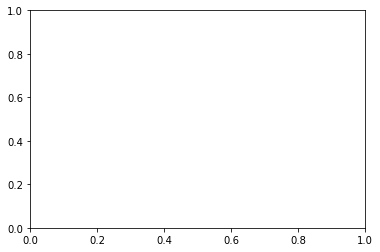

In [34]:
PID_State['Fraud']=np.where(PID_State['Fraud'] == 1, "1", "0")
PID_State.plot.scatter(y = 'Claims_num', x='state_unique',color='Fraud')

In [733]:
pd.options.plotting.backend = "plotly"

In [735]:
Phys_State['Fraud']=np.where(Phys_State['Fraud'] == 1, "1", "0")
Phys_State.plot.scatter(y='PID_unique', x='state_unique',color='Fraud')

In [462]:
#check PHY416093
phys.loc[phys['AttendingPhysician'] == 'PHY416093']

,PID,AttendingPhysician,State,County,StartDt,Fraud
16174,PRV52019,PHY416093,33,240,2009-03-01,1
16201,PRV52019,PHY416093,10,470,2009-01-12,1
16212,PRV52019,PHY416093,18,550,2009-09-02,1
16265,PRV52019,PHY416093,11,840,2009-06-08,1
16274,PRV52019,PHY416093,23,320,2009-06-20,1
...,...,...,...,...,...,...
17549,PRV52019,PHY416093,10,360,2009-12-07,1
17554,PRV52019,PHY416093,31,190,2009-05-14,1
17555,PRV52019,PHY416093,13,130,2009-07-06,1
17558,PRV52019,PHY416093,13,130,2009-09-10,1


In [456]:
# number of fraud provider each state has
fraud_provider_state = fraud_phys.groupby('State')['PID'].nunique().reset_index().sort_values('PID',ascending = False)
fraud_provider_state 

,State,PID
9,10,417
4,5,303
43,45,232
32,33,229
2,3,207
51,54,196
13,14,151
33,34,147
22,23,127
38,39,127


In [518]:
# fraud provider vs fraud claims in the order of top 10 states with most fraud provider
# do not make sense since fraud claims comes from  fraud provider
fraud_provider_claims = fraud_provider_state.merge(fraud_claims_state)
fraud_provider_claims.plot(x = 'PID', y='Fraud')

# Reimbursement amount

In [551]:
# Average reimbursement amount per phys
avg_reim_phycisian = phys.groupby('AttendingPhysician')['AmtReimbursed'].mean().reset_index()
avg_reim_phycisian

,AttendingPhysician,AmtReimbursed
0,PHY311001,170.000000
1,PHY311002,3000.000000
2,PHY311004,275.000000
3,PHY311005,90.000000
4,PHY311006,70.000000
...,...,...
82058,PHY434153,100.000000
82059,PHY434155,50.000000
82060,PHY434156,40.000000
82061,PHY434157,30.000000


In [553]:
#average reimbursed amt for fraud claims and non fraud claims (each claim)
fraud_non_fraud_avg =  phys.groupby(['Fraud'])['AmtReimbursed'].mean().reset_index()
fraud_non_fraud_avg

,Fraud,AmtReimbursed
0,0,755.213352
1,1,1389.505066


In [556]:
# for each phys, calculate the avg fraud amt_reim and avg_non_fraud_reim
avg_fraud_reim = phys.groupby(['AttendingPhysician','Fraud'])['AmtReimbursed'].mean().reset_index()
avg_fraud_reim = avg_fraud_reim.pivot(index='AttendingPhysician', columns='Fraud', values='AmtReimbursed')
avg_fraud_reim = avg_fraud_reim.fillna(0)
avg_fraud_reim

Fraud,0,1
AttendingPhysician,,
PHY311001,170.0,0.000000
PHY311002,0.0,3000.000000
PHY311004,275.0,0.000000
PHY311005,90.0,0.000000
PHY311006,70.0,0.000000
...,...,...
PHY434153,0.0,100.000000
PHY434155,50.0,0.000000
PHY434156,40.0,0.000000


In [688]:
#amt_reim per provider 
total_amtreim_provider = phys.groupby(['PID','Is_inpatient'])['AmtReimbursed'].mean().reset_index()
# avg_reim_phycisian = avg_reim_phycisian.merge(phys[['PID', 'Fraud']].drop_duplicates())
# avg_reim_phycisian = avg_reim_phycisian.groupby('Fraud')['AmtReimbursed','InpatientAnnualReimbursementAmt','OutpatientAnnualReimbursementAmt'].mean().reset_index()
total_amtreim_provider = total_amtreim_provider.pivot(index='PID', columns='Is_inpatient', values='AmtReimbursed').reset_index()
total_amtreim_provider = total_amtreim_provider.rename(columns = {0:'OutPatient', 1: 'InPatient'})
total_amtreim_provider = total_amtreim_provider.merge(flagged_pid)
total_amtreim_provider.describe()

,OutPatient,InPatient
count,5012.000000,2092.000000
mean,304.380863,10208.098169
std,1365.026294,5139.034968
min,0.000000,0.000000
25%,189.182609,7400.000000
50%,265.153846,9484.693085
75%,330.273126,11733.962441
max,95580.000000,57000.000000


Fraud providers have higher avg reimbure amt than non fraud providers.

In [617]:
# PID with fraud 
flagged_pid = phys[['PID', 'Fraud']].drop_duplicates()

In [717]:
# label group
total_amtreim_provider = total_amtreim_provider.fillna(0)
total_amtreim_provider['GroupOut'] = total_amtreim_provider.apply(g, axis =1)
total_amtreim_provider['GroupIn'] = total_amtreim_provider.apply(m, axis =1)
#remove the out liner 
total_amtreim_provider.loc[90]
Outlier_Outpatient = total_amtreim_provider.loc[[90, 1693,1973],:]
outTable = total_amtreim_provider.drop([90,1693,1973])
total_amtreim_provider.sort_values('InPatient',ascending = False).head(10)

,PID,OutPatient,InPatient,Fraud,GroupOut,GroupIn
5111,PRV57399,0.000000,57000.000000,0,Less Than 25%,More than 75%
4841,PRV57080,0.000000,57000.000000,0,Less Than 25%,More than 75%
1234,PRV52537,0.000000,57000.000000,0,Less Than 25%,More than 75%
1218,PRV52518,306.800000,57000.000000,0,Less Than 75%,More than 75%
4527,PRV56664,185.714286,57000.000000,0,Less Than 25%,More than 75%
542,PRV51681,725.200000,51000.000000,0,More than 75%,More than 75%
3734,PRV55675,220.246914,40500.000000,0,Less Than 50%,More than 75%
1922,PRV53397,570.000000,38666.666667,1,More than 75%,More than 75%
202,PRV51259,115.294118,37500.000000,0,Less Than 25%,More than 75%
1631,PRV53033,0.000000,37500.000000,0,Less Than 25%,More than 75%


In [724]:
GroupOut = total_amtreim_provider.groupby(['GroupOut', 'Fraud'])['PID'].count().reset_index()
GroupOut = GroupOut.pivot(index='GroupOut', columns='Fraud', values='PID').reset_index()
GroupOut = GroupOut.rename(columns = {'0':'non_Fraud', '1':'Fraud'})
GroupOut = GroupOut.fillna(0)

In [725]:
# px.scatter(outTable, x="GroupOut",color='Fraud')
px.bar(GroupOut, x="GroupOut", y=["Fraud","non_Fraud"])

In [726]:
out = outTable.loc[outTable['GroupOut'] == 'Less Than 75%']
px.scatter(out, x="OutPatient",color='Fraud')

In [697]:
GroupIn = total_amtreim_provider.groupby(['GroupIn', 'Fraud'])['PID'].count().reset_index()
GroupIn = GroupIn.pivot(index='GroupIn', columns='Fraud', values='PID').reset_index()
GroupIn = GroupIn.rename(columns = {'0':'non_Fraud', '1':'Fraud'})
GroupIn

Fraud,GroupIn,non_Fraud,Fraud
0,Less Than 25%,491,24
1,Less Than 50%,423,108
2,Less Than 75%,337,186
3,More than 75%,401,122


In [699]:
px.bar(GroupIn, x="GroupIn", y=["Fraud","non_Fraud"])

In [637]:
amtReim = total_amtreim_provider[['PID', 'AmtReimbursed']]
amtReim_fraud = amtReim.merge(flagged_pid)
amtReim_fraud['Group'] = amtReim.apply(g, axis =1 )
# amtReim.groupby('Group')['PID'].count().reset_index().rename(columns={'PID':'total_PID'})
# amtReim_fraud = amtReim_fraud.groupby(['Group','Fraud'])['PID'].count().reset_index()
# amtReim_fraud = amtReim_fraud.pivot(index='Group', columns='Fraud', values='PID').reset_index()
amtReim_fraud.describe()

,AmtReimbursed
count,5.410000e+03
mean,1.028730e+05
std,2.687367e+05
min,0.000000e+00
25%,4.460000e+03
50%,1.980500e+04
75%,8.556500e+04
max,5.996050e+06


In [749]:
# plot 
px.scatter(amtReim_fraud, x="Group", color='Fraud' )

In [595]:
inAnnual = avg_reim_provider[['PID', 'InpatientAnnualReimbursementAmt']]

In [596]:
outAnnual = avg_reim_provider[['PID', 'OutpatientAnnualReimbursementAmt']]

In [703]:
def g(x):
    if x['OutPatient'] < 190:
        return 'Less Than 25%'
    elif 190 <= x['OutPatient'] < 265:
        return 'Less Than 50%'
    elif 265 <= x['OutPatient'] < 330:
        return 'Less Than 75%'
    elif 5000 >x['OutPatient'] >= 330:
        return 'More than 75%'
    else
        return 'Outliers'

In [662]:
def m(x):
    if x['InPatient'] < 7400:
        return 'Less Than 25%'
    elif 7400 <= x['InPatient'] < 9485:
        return 'Less Than 50%'
    elif 9485 <= x['InPatient'] < 11733:
        return 'Less Than 75%'
    elif x['InPatient'] >= 11733:
        return 'More than 75%'
    